# British Airways Customer Review Analysis (Forage)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

The data below has been acquired through webscraping using Beautiful Soup, and contains the customer review heading, how many stars they gave each aspect of the service, and whether they'd recommend BA

In [2]:
DATA = pd.read_csv('DATA.csv')
DATA['Date'] = DATA['Date'].str.replace('"','')
DATA['Text_headers'] = DATA['Text_headers'].str.replace('"','')
DATA['Text_headers'] = DATA['Text_headers'].str.replace(',','')
DATA['Text_headers'] = DATA['Text_headers'].str.replace("'",'')
DATA['Text_headers'] = DATA['Text_headers'].str.replace('-','')
DATA['Text_headers'] = DATA['Text_headers'].str.replace('\n','')
DATA['Date'] =DATA['Date'].apply(pd.to_datetime)
DATA

,Unnamed: 0,Date,Fulltext,Text_headers,Cats,Stars,Recommend,Mean_Stars
0,0,2023-09-15,"<div class=""text_content"" itemprop=""reviewBody...",[Worst BA experience],"[' seat_comfort', ' cabin_staff_service', ' gr...","[1, 1, 1, 2]",no,1.250000
1,1,2023-09-13,"<div class=""text_content"" itemprop=""reviewBody...",[the worst airline service],"[' seat_comfort', ' cabin_staff_service', ' gr...","[3, 3, 1, 1]",no,2.000000
2,2,2023-09-11,"<div class=""text_content"" itemprop=""reviewBody...",[service on board was impeccable],"[' seat_comfort', ' cabin_staff_service', ' fo...","[3, 5, 4, 2, 5]",yes,3.800000
3,3,2023-09-10,"<div class=""text_content"" itemprop=""reviewBody...",[a national disgrace],"[' ground_service', ' value_for_money']","[1, 1]",no,1.000000
4,4,2023-09-09,"<div class=""text_content"" itemprop=""reviewBody...",[The worst service ever],"[' seat_comfort', ' cabin_staff_service', ' fo...","[3, 1, 1, 1, 3, 1, 3]",no,1.857143
...,...,...,...,...,...,...,...,...
3644,3644,2012-08-29,"<div class=""text_content"" itemprop=""reviewBody...",[],"[' seat_comfort', ' cabin_staff_service', ' fo...","[4, 5, 4, 3, 4]",yes,4.000000
3645,3645,2012-08-28,"<div class=""text_content"" itemprop=""reviewBody...",[],"[' seat_comfort', ' cabin_staff_service', ' fo...","[1, 3, 5, 1, 4]",yes,2.800000
3646,3646,2011-10-12,"<div class=""text_content"" itemprop=""reviewBody...",[],[' value_for_money'],[5],yes,5.000000
3647,3647,2011-10-11,"<div class=""text_content"" itemprop=""reviewBody...",[],"[' seat_comfort', ' cabin_staff_service', ' fo...","[5, 2, 2, 1, 1]",no,2.200000


First, a quick look at how the mean no. stars relates to whether they recommend the airline

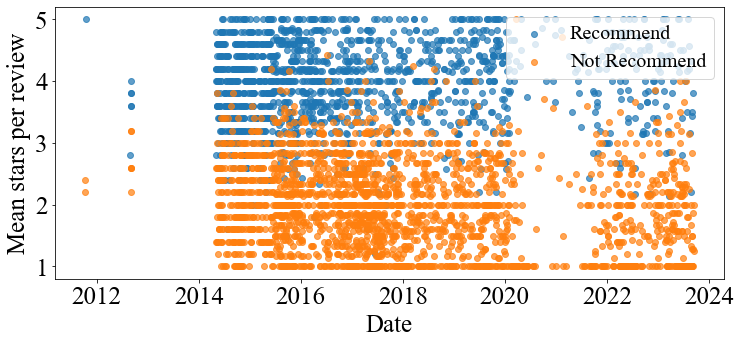

In [39]:
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

mpl.rc('font', size=25)
mpl.rc('xtick', labelsize=25)
mpl.rc('ytick', labelsize=25)
mpl.rc('font',family='Times New Roman')
plt.figure(figsize=(12,5))

DATA_YES = DATA[DATA['Recommend']=='yes']
DATA_NO = DATA[DATA['Recommend']=='no']

plt.scatter(DATA_YES['Date'],DATA_YES['Mean_Stars'],label='Recommend',alpha=0.7)
plt.scatter(DATA_NO['Date'],DATA_NO['Mean_Stars'],label='Not Recommend',alpha=0.7)
plt.legend(fontsize=20)
plt.ylabel('Mean stars per review')
plt.xlabel('Date')
plt.savefig('Scatter.pdf',dpi=600,bbox_inches='tight')

Looks like it's about 2.5 stars with some overlap - perhaps as could be expected. Let's look at the categories (and clean up the columns first)

In [4]:
DATA['Cats'] = DATA['Cats'].str.replace('[','')
DATA['Cats'] = DATA['Cats'].str.replace(']','')
DATA['Cats'] = DATA['Cats'].str.replace("'",'')
DATA['Cats'] = DATA['Cats'].str.replace(r"\\",'')
DATA['Cats'] = DATA['Cats'].str.replace('"','')
DATA['Cats'] = DATA['Cats'].str.replace(' ','')


DATA['Stars'] = DATA['Stars'].str.replace('[','')
DATA['Stars'] = DATA['Stars'].str.replace(']','')
DATA['Stars'] = DATA['Stars'].str.replace("'",'')

/Users/eleonoraparrag/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/Users/eleonoraparrag/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/Users/eleonoraparrag/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/Users/eleonoraparrag/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to Fa

In [5]:
Cats = DATA['Cats'].str.split(',', expand=True)#split the categories into columns
Cats

,0,1,2,3,4,5,6
0,seat_comfort,cabin_staff_service,ground_service,value_for_money,None,None,None
1,seat_comfort,cabin_staff_service,ground_service,value_for_money,None,None,None
2,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,value_for_money,None,None
3,ground_service,value_for_money,None,None,None,None,None
4,seat_comfort,cabin_staff_service,food_and_beverages,inflight_entertainment,ground_service,wifi_and_connectivity,value_for_money
...,...,...,...,...,...,...,...
3644,seat_comfort,cabin_staff_service,food_and_beverages,inflight_entertainment,value_for_money,None,None
3645,seat_comfort,cabin_staff_service,food_and_beverages,inflight_entertainment,value_for_money,None,None
3646,value_for_money,None,None,None,None,None,None
3647,seat_comfort,cabin_staff_service,food_and_beverages,inflight_entertainment,value_for_money,None,None


In [6]:

Stars = DATA['Stars'].str.split(',', expand=True) #how many stars?
Stars

,0,1,2,3,4,5,6
0,1,1,1,2,None,None,None
1,3,3,1,1,None,None,None
2,3,5,4,2,5,None,None
3,1,1,None,None,None,None,None
4,3,1,1,1,3,1,3
...,...,...,...,...,...,...,...
3644,4,5,4,3,4,None,None
3645,1,3,5,1,4,None,None
3646,5,None,None,None,None,None,None
3647,5,2,2,1,1,None,None


In [7]:
Cats['food_and_beverages'] = ['None']*len(Cats) 
Cats['seat_comfort'] = ['None']*len(Cats) 
Cats['value_for_money'] = ['None']*len(Cats) 
Cats['ground_service'] = ['None']*len(Cats) 
Cats['inflight_entertainment'] = ['None']*len(Cats) 
Cats['wifi_and_connectivity'] = ['None']*len(Cats) 
Cats['cabin_staff_service'] = ['None']*len(Cats) 

Cats

,0,1,2,3,4,5,6,food_and_beverages,seat_comfort,value_for_money,ground_service,inflight_entertainment,wifi_and_connectivity,cabin_staff_service
0,seat_comfort,cabin_staff_service,ground_service,value_for_money,None,None,None,None,None,None,None,None,None,None
1,seat_comfort,cabin_staff_service,ground_service,value_for_money,None,None,None,None,None,None,None,None,None,None
2,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,value_for_money,None,None,None,None,None,None,None,None,None
3,ground_service,value_for_money,None,None,None,None,None,None,None,None,None,None,None,None
4,seat_comfort,cabin_staff_service,food_and_beverages,inflight_entertainment,ground_service,wifi_and_connectivity,value_for_money,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,seat_comfort,cabin_staff_service,food_and_beverages,inflight_entertainment,value_for_money,None,None,None,None,None,None,None,None,None
3645,seat_comfort,cabin_staff_service,food_and_beverages,inflight_entertainment,value_for_money,None,None,None,None,None,None,None,None,None
3646,value_for_money,None,None,None,None,None,None,None,None,None,None,None,None,None
3647,seat_comfort,cabin_staff_service,food_and_beverages,inflight_entertainment,value_for_money,None,None,None,None,None,None,None,None,None


Add the no. stars into the columns

In [8]:
cat_poss = ['food_and_beverages','seat_comfort','value_for_money','ground_service',
            'inflight_entertainment','wifi_and_connectivity','cabin_staff_service']
for n in range(len(Cats)):
    for i in range(0,7):
        for z in cat_poss:
            if Cats[i][n] == z:
                Cats[z][n] = Stars[i][n]
Cats_full = Cats[['food_and_beverages','seat_comfort','value_for_money','ground_service',
            'inflight_entertainment','wifi_and_connectivity','cabin_staff_service']]
Cats_full

,food_and_beverages,seat_comfort,value_for_money,ground_service,inflight_entertainment,wifi_and_connectivity,cabin_staff_service
0,None,1,2,1,None,None,1
1,None,3,1,1,None,None,3
2,4,3,5,2,None,None,5
3,None,None,1,1,None,None,None
4,1,3,3,3,1,1,1
...,...,...,...,...,...,...,...
3644,4,4,4,None,3,None,5
3645,5,1,4,None,1,None,3
3646,None,None,5,None,None,None,None
3647,2,5,1,None,1,None,2


In [9]:
DATA2 = pd.concat((DATA,Cats_full),axis=1)
DATA2

,Unnamed: 0,Date,Fulltext,Text_headers,Cats,Stars,Recommend,Mean_Stars,food_and_beverages,seat_comfort,value_for_money,ground_service,inflight_entertainment,wifi_and_connectivity,cabin_staff_service
0,0,2023-09-15,"<div class=""text_content"" itemprop=""reviewBody...",[Worst BA experience],"seat_comfort,cabin_staff_service,ground_servic...","1, 1, 1, 2",no,1.250000,None,1,2,1,None,None,1
1,1,2023-09-13,"<div class=""text_content"" itemprop=""reviewBody...",[the worst airline service],"seat_comfort,cabin_staff_service,ground_servic...","3, 3, 1, 1",no,2.000000,None,3,1,1,None,None,3
2,2,2023-09-11,"<div class=""text_content"" itemprop=""reviewBody...",[service on board was impeccable],"seat_comfort,cabin_staff_service,food_and_beve...","3, 5, 4, 2, 5",yes,3.800000,4,3,5,2,None,None,5
3,3,2023-09-10,"<div class=""text_content"" itemprop=""reviewBody...",[a national disgrace],"ground_service,value_for_money","1, 1",no,1.000000,None,None,1,1,None,None,None
4,4,2023-09-09,"<div class=""text_content"" itemprop=""reviewBody...",[The worst service ever],"seat_comfort,cabin_staff_service,food_and_beve...","3, 1, 1, 1, 3, 1, 3",no,1.857143,1,3,3,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,3644,2012-08-29,"<div class=""text_content"" itemprop=""reviewBody...",[],"seat_comfort,cabin_staff_service,food_and_beve...","4, 5, 4, 3, 4",yes,4.000000,4,4,4,None,3,None,5
3645,3645,2012-08-28,"<div class=""text_content"" itemprop=""reviewBody...",[],"seat_comfort,cabin_staff_service,food_and_beve...","1, 3, 5, 1, 4",yes,2.800000,5,1,4,None,1,None,3
3646,3646,2011-10-12,"<div class=""text_content"" itemprop=""reviewBody...",[],value_for_money,5,yes,5.000000,None,None,5,None,None,None,None
3647,3647,2011-10-11,"<div class=""text_content"" itemprop=""reviewBody...",[],"seat_comfort,cabin_staff_service,food_and_beve...","5, 2, 2, 1, 1",no,2.200000,2,5,1,None,1,None,2


In [10]:
DATA2.head(50)

,Unnamed: 0,Date,Fulltext,Text_headers,Cats,Stars,Recommend,Mean_Stars,food_and_beverages,seat_comfort,value_for_money,ground_service,inflight_entertainment,wifi_and_connectivity,cabin_staff_service
0,0,2023-09-15,"<div class=""text_content"" itemprop=""reviewBody...",[Worst BA experience],"seat_comfort,cabin_staff_service,ground_servic...","1, 1, 1, 2",no,1.250000,None,1,2,1,None,None,1
1,1,2023-09-13,"<div class=""text_content"" itemprop=""reviewBody...",[the worst airline service],"seat_comfort,cabin_staff_service,ground_servic...","3, 3, 1, 1",no,2.000000,None,3,1,1,None,None,3
2,2,2023-09-11,"<div class=""text_content"" itemprop=""reviewBody...",[service on board was impeccable],"seat_comfort,cabin_staff_service,food_and_beve...","3, 5, 4, 2, 5",yes,3.800000,4,3,5,2,None,None,5
3,3,2023-09-10,"<div class=""text_content"" itemprop=""reviewBody...",[a national disgrace],"ground_service,value_for_money","1, 1",no,1.000000,None,None,1,1,None,None,None
4,4,2023-09-09,"<div class=""text_content"" itemprop=""reviewBody...",[The worst service ever],"seat_comfort,cabin_staff_service,food_and_beve...","3, 1, 1, 1, 3, 1, 3",no,1.857143,1,3,3,3,1,1,1
5,5,2023-09-06,"<div class=""text_content"" itemprop=""reviewBody...",[Cannot recommend],"seat_comfort,cabin_staff_service,food_and_beve...","1, 3, 1, 1, 1, 1, 1",no,1.285714,1,1,1,1,1,1,3
6,6,2023-09-04,"<div class=""text_content"" itemprop=""reviewBody...",[BA is worse than a low cost carrier],"seat_comfort,ground_service,value_for_money","1, 1, 1",no,1.000000,None,1,1,1,None,None,None
7,7,2023-09-04,"<div class=""text_content"" itemprop=""reviewBody...",[less than a premium experience],"seat_comfort,cabin_staff_service,food_and_beve...","3, 4, 3, 4, 3, 4",yes,3.500000,3,3,4,4,None,3,4
8,8,2023-09-04,"<div class=""text_content"" itemprop=""reviewBody...",[good but not spectacular],"seat_comfort,cabin_staff_service,food_and_beve...","4, 3, 3, 3, 4, 3, 4",yes,3.428571,3,4,4,4,3,3,3
9,9,2023-09-04,"<div class=""text_content"" itemprop=""reviewBody...",[Lies and misleading unprofessional service],"seat_comfort,cabin_staff_service,food_and_beve...","2, 4, 3, 3, 4, 1",no,2.833333,3,2,1,4,3,None,4


In [11]:

def get_figure(DATA2,ax1):
    FOOD = DATA2[DATA2['food_and_beverages']!='None']
    FOOD['food_and_beverages'] = FOOD['food_and_beverages'].astype(int)
    FOOD = FOOD[['Date','food_and_beverages']].sort_values(by ='Date', ascending=True)
    FOOD['Rolling_average'] = FOOD.rolling(100, min_periods=1, center=True).mean(std=3)
    ax1.plot(FOOD['Date'],FOOD['Rolling_average'],label='Food and Beverages')


    FOOD = DATA2[DATA2['seat_comfort']!='None']
    FOOD['seat_comfort'] = FOOD['seat_comfort'].astype(int)
    FOOD = FOOD[['Date','seat_comfort']].sort_values(by ='Date', ascending=True)
    FOOD['Rolling_average'] = FOOD.rolling(100, min_periods=1, center=True).mean(std=3)
    ax1.plot(FOOD['Date'],FOOD['Rolling_average'],label='Seat Comfort')


    FOOD = DATA2[DATA2['value_for_money']!='None']
    FOOD['value_for_money'] = FOOD['value_for_money'].astype(int)
    FOOD = FOOD[['Date','value_for_money']].sort_values(by ='Date', ascending=True)
    FOOD['Rolling_average'] = FOOD.rolling(100, min_periods=1, center=True).mean(std=3)
    ax1.plot(FOOD['Date'],FOOD['Rolling_average'],label='Value for Money')


    FOOD = DATA2[DATA2['ground_service']!='None']
    FOOD['ground_service'] = FOOD['ground_service'].astype(int)
    FOOD = FOOD[['Date','ground_service']].sort_values(by ='Date', ascending=True)
    FOOD['Rolling_average'] = FOOD.rolling(100, min_periods=1, center=True).mean(std=3)
    ax1.plot(FOOD['Date'],FOOD['Rolling_average'],label='Ground Service')


    FOOD = DATA2[DATA2['inflight_entertainment']!='None']
    FOOD['inflight_entertainment'] = FOOD['inflight_entertainment'].astype(int)
    FOOD = FOOD[['Date','inflight_entertainment']].sort_values(by ='Date', ascending=True)
    FOOD['Rolling_average'] = FOOD.rolling(100, min_periods=1, center=True).mean(std=3)
    ax1.plot(FOOD['Date'],FOOD['Rolling_average'],label='Inflight Entertainment')



    FOOD = DATA2[DATA2['wifi_and_connectivity']!='None']
    FOOD['wifi_and_connectivity'] = FOOD['wifi_and_connectivity'].astype(int)
    FOOD = FOOD[['Date','wifi_and_connectivity']].sort_values(by ='Date', ascending=True)
    FOOD['Rolling_average'] = FOOD.rolling(100, min_periods=1, center=True).mean(std=3)
    ax1.plot(FOOD['Date'],FOOD['Rolling_average'],label='WiFi and Connectivity')


    FOOD = DATA2[DATA2['cabin_staff_service']!='None']
    FOOD['cabin_staff_service'] = FOOD['cabin_staff_service'].astype(int)
    FOOD = FOOD[['Date','cabin_staff_service']].sort_values(by ='Date', ascending=True)
    FOOD['Rolling_average'] = FOOD.rolling(100, min_periods=1, center=True).mean(std=3)
    ax1.plot(FOOD['Date'],FOOD['Rolling_average'],label='Cabin Staff Service')

    

/Users/eleonoraparrag/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/eleonoraparrag/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/eleonoraparrag/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A valu

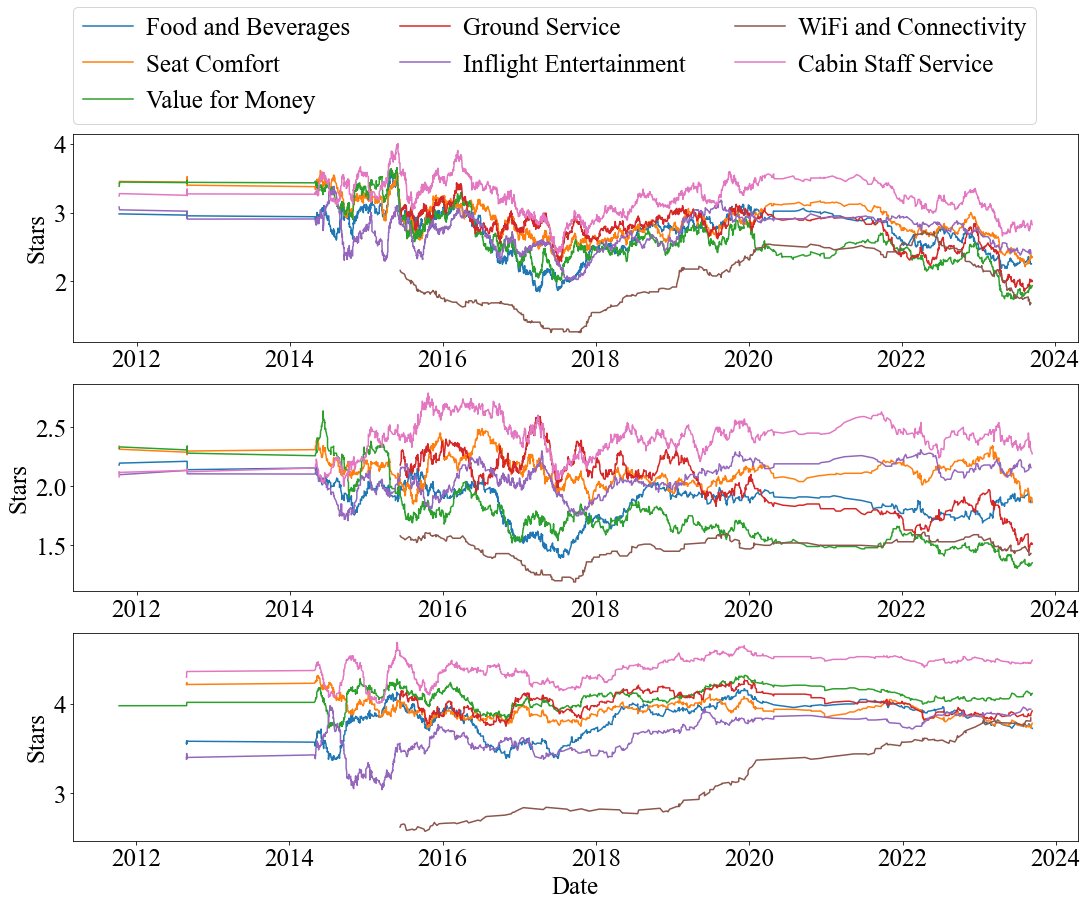

In [40]:
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

mpl.rc('font', size=25)
mpl.rc('xtick', labelsize=25)
mpl.rc('ytick', labelsize=25)
mpl.rc('font',family='Times New Roman')
f,ax = plt.subplots(nrows=3,ncols=1,figsize=(18,13))
ax = ax.ravel()
get_figure(DATA2,ax[0])
get_figure(DATA2[DATA2['Recommend'] =='no'],ax[1])
get_figure(DATA2[DATA2['Recommend'] =='yes'],ax[2])
ax[0].legend(loc=(0,1.05), ncol=3,handletextpad=0.5,fontsize=25)

ax[2].set_xlabel('Date')
ax[0].set_ylabel('Stars')
ax[1].set_ylabel('Stars')
ax[2].set_ylabel('Stars')
plt.savefig('Classes.pdf',dpi=600,bbox_inches='tight')

Now we can look at how this varies over time for each category - looks like they all took a dip around 2018 (and there not really any data around the pandemic which would be expected). It also looks like the ratings correlate with each other and if they don't like something they probably won't like the rest.

# SENTIMENT ANALYSIS

This section looks at the words in the reviews and tries to link them to recommendations

In [13]:
YES = ' '.join(DATA_YES['Text_headers'].tolist())
NO = ' '.join(DATA_NO['Text_headers'].tolist())
YES = YES.split(' ')
NO = NO.split(' ')

In [14]:
import re
import nltk
from nltk.stem import WordNetLemmatizer

# Stopword removal, converting uppercase into lower case, and lemmatization
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('a')
stopwords.append('ba')
stopwords.append('went')
stopwords.append('let')
stopwords.append('ive')
stopwords.append('made')
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
data_without_stopwords = []
for i in range(0, len(YES)):
    doc = re.sub('[^a-zA-Z]', ' ', YES[i])
    doc = doc.lower()
    doc = doc.split()
    doc = [lemmatizer.lemmatize(word) for word in doc if not word in set(stopwords)]
    doc = ' '.join(doc)
    data_without_stopwords.append(doc)
    
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
data_without_stopwords_NO = []
for i in range(0, len(NO)):
    doc = re.sub('[^a-zA-Z]', ' ', NO[i])
    doc = doc.lower()
    doc = doc.split()
    doc = [lemmatizer.lemmatize(word) for word in doc if not word in set(stopwords)]
    doc = ' '.join(doc)
    data_without_stopwords_NO.append(doc)
    
words=[' '.join(data_without_stopwords),' '.join(data_without_stopwords_NO)]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/eleonoraparrag/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/eleonoraparrag/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer() 
vectors = vectorizer.fit_transform(words)

print("n_samples: %d, n_features: %d" % vectors.shape)


tf_idf = pd.DataFrame(vectors.todense()) 
tf_idf.columns = vectorizer.get_feature_names()
tfidf_matrix = tf_idf.T

print(tfidf_matrix)

n_samples: 2, n_features: 1713
                       0         1
abandoned       0.000000  0.003790
abandoning      0.000000  0.003790
abdication      0.000000  0.003790
able            0.000000  0.003790
aboveandbeyond  0.004658  0.000000
...                  ...       ...
youd            0.000000  0.003790
young           0.000000  0.003790
youre           0.000000  0.003790
zero            0.000000  0.018949
zone            0.000000  0.003790

[1713 rows x 2 columns]


/Users/eleonoraparrag/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
tfidf_matrix.sort_values(by =1, ascending=False)[:30]

,0,1
service,0.404307,0.428743
airline,0.046396,0.339759
worst,0.000000,0.234970
experience,0.212095,0.229202
flight,0.407621,0.223809
seat,0.208781,0.196844
customer,0.019884,0.186058
british,0.036454,0.175272
airway,0.039768,0.172576
food,0.115990,0.134825


In [17]:
tfidf_matrix.sort_values(by =0, ascending=False)[:30]


,0,1
flight,0.407621,0.223809
service,0.404307,0.428743
crew,0.397679,0.083591
good,0.351283,0.037751
friendly,0.228665,0.013482
experience,0.212095,0.229202
seat,0.208781,0.196844
cabin,0.195525,0.078198
excellent,0.129246,0.002696
staff,0.115990,0.099770


# FULLTEXT ANALYSIS

In [26]:
DATA2 = pd.concat((DATA,Cats_full),axis=1)

DATA2['Fulltext'] = DATA2['Fulltext'].str.replace('<strong><a href="https://www.airlinequality.com/verified-reviews/"><em>Not Verified</em></a></strong>','')
DATA2['Fulltext'] = DATA2['Fulltext'].str.replace('<div class="text_content" itemprop="reviewBody">✅ <strong><a href="https://www.airlinequality.com/verified-reviews/"><em>Trip Verified</em></a></strong> |','')
DATA2['Fulltext'] = DATA2['Fulltext'].str.replace('</div>','')
DATA2['Fulltext'] = DATA2['Fulltext'].str.replace('<div class="text_content" itemprop="reviewBody">','')
DATA2['Fulltext'] = DATA2['Fulltext'].str.replace('|','')

DATA2

/Users/eleonoraparrag/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/eleonoraparrag/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/Users/eleonoraparrag/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys


,Unnamed: 0,Date,Fulltext,Text_headers,Cats,Stars,Recommend,Mean_Stars,food_and_beverages,seat_comfort,value_for_money,ground_service,inflight_entertainment,wifi_and_connectivity,cabin_staff_service
0,0,2023-09-15,Worst BA experience. I was supposed to fly ou...,[Worst BA experience],"seat_comfort,cabin_staff_service,ground_servic...","1, 1, 1, 2",no,1.250000,None,1,2,1,None,None,1
1,1,2023-09-13,My daughter and I were denied boarding on ou...,[the worst airline service],"seat_comfort,cabin_staff_service,ground_servic...","3, 3, 1, 1",no,2.000000,None,3,1,1,None,None,3
2,2,2023-09-11,Despite boarding being the usual free for all...,[service on board was impeccable],"seat_comfort,cabin_staff_service,food_and_beve...","3, 5, 4, 2, 5",yes,3.800000,4,3,5,2,None,None,5
3,3,2023-09-10,"Flight cancelled, no crew! 9th September 20...",[a national disgrace],"ground_service,value_for_money","1, 1",no,1.000000,None,None,1,1,None,None,None
4,4,2023-09-09,"The worst service ever, my baggage did not ...",[The worst service ever],"seat_comfort,cabin_staff_service,food_and_beve...","3, 1, 1, 1, 3, 1, 3",no,1.857143,1,3,3,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,3644,2012-08-29,YYZ to LHR - July 2012 - I flew overnight in p...,[],"seat_comfort,cabin_staff_service,food_and_beve...","4, 5, 4, 3, 4",yes,4.000000,4,4,4,None,3,None,5
3645,3645,2012-08-28,LHR to HAM. Purser addresses all club passenge...,[],"seat_comfort,cabin_staff_service,food_and_beve...","1, 3, 5, 1, 4",yes,2.800000,5,1,4,None,1,None,3
3646,3646,2011-10-12,My son who had worked for British Airways urge...,[],value_for_money,5,yes,5.000000,None,None,5,None,None,None,None
3647,3647,2011-10-11,London City-New York JFK via Shannon on A318 b...,[],"seat_comfort,cabin_staff_service,food_and_beve...","5, 2, 2, 1, 1",no,2.200000,2,5,1,None,1,None,2


In [19]:
def fix_text(YES):
    YES = YES.split(' ')
    lemmatizer = WordNetLemmatizer()
    data_without_stopwords = []
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.append('a')
    stopwords.append('ba')
    stopwords.append('went')
    stopwords.append('let')
    stopwords.append('ive')
    stopwords.append('made')
    stopwords.append('flight')
    stopwords.append('british')
    stopwords.append('airways')
    stopwords.append('airway')
    stopwords.append('www')
    stopwords.append('http')
    stopwords.append('com')
    stopwords.append('href')
    stopwords.append('review')
    stopwords.append('verified')
    stopwords.append('airlinequality')
    stopwords.append('airline')
    for i in range(len(YES)):
        doc = re.sub('[^a-zA-Z]', ' ', YES[i])
        doc = doc.lower()
        doc = doc.split()
        doc = [lemmatizer.lemmatize(word) for word in doc if not word in set(stopwords)]
        doc = ' '.join(doc)
        data_without_stopwords.append(doc)
    data_without_stopwords = [i for i in data_without_stopwords if i != '']
    return(data_without_stopwords)


In [27]:
for i in range(len(DATA2)):
    DATA2['Fulltext'][i] = fix_text(DATA2['Fulltext'][i])

/Users/eleonoraparrag/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
DATA2

,Unnamed: 0,Date,Fulltext,Text_headers,Cats,Stars,Recommend,Mean_Stars,food_and_beverages,seat_comfort,value_for_money,ground_service,inflight_entertainment,wifi_and_connectivity,cabin_staff_service
0,0,2023-09-15,"[worst, experience, supposed, fly, italy, sept...",[Worst BA experience],"seat_comfort,cabin_staff_service,ground_servic...","1, 1, 1, 2",no,1.250000,None,1,2,1,None,None,1
1,1,2023-09-13,"[daughter, denied, boarding, business, class, ...",[the worst airline service],"seat_comfort,cabin_staff_service,ground_servic...","3, 3, 1, 1",no,2.000000,None,3,1,1,None,None,3
2,2,2023-09-11,"[despite, boarding, usual, free, lhr, group, c...",[service on board was impeccable],"seat_comfort,cabin_staff_service,food_and_beve...","3, 5, 4, 2, 5",yes,3.800000,4,3,5,2,None,None,5
3,3,2023-09-10,"[cancelled, crew, th, september, peak, holiday...",[a national disgrace],"ground_service,value_for_money","1, 1",no,1.000000,None,None,1,1,None,None,None
4,4,2023-09-09,"[worst, service, ever, baggage, arrive, time, ...",[The worst service ever],"seat_comfort,cabin_staff_service,food_and_beve...","3, 1, 1, 1, 3, 1, 3",no,1.857143,1,3,3,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,3644,2012-08-29,"[yyz, lhr, july, flew, overnight, premium, eco...",[],"seat_comfort,cabin_staff_service,food_and_beve...","4, 5, 4, 3, 4",yes,4.000000,4,4,4,None,3,None,5
3645,3645,2012-08-28,"[lhr, ham, purser, address, club, passenger, n...",[],"seat_comfort,cabin_staff_service,food_and_beve...","1, 3, 5, 1, 4",yes,2.800000,5,1,4,None,1,None,3
3646,3646,2011-10-12,"[son, worked, urged, fly, kansa, city, recomme...",[],value_for_money,5,yes,5.000000,None,None,5,None,None,None,None
3647,3647,2011-10-11,"[london, city new, york, jfk, via, shannon, re...",[],"seat_comfort,cabin_staff_service,food_and_beve...","5, 2, 2, 1, 1",no,2.200000,2,5,1,None,1,None,2


In [29]:
DATA2['Month'] = DATA2['Date'].dt.strftime("%Y-%m")
DATA2

,Unnamed: 0,Date,Fulltext,Text_headers,Cats,Stars,Recommend,Mean_Stars,food_and_beverages,seat_comfort,value_for_money,ground_service,inflight_entertainment,wifi_and_connectivity,cabin_staff_service,Month
0,0,2023-09-15,"[worst, experience, supposed, fly, italy, sept...",[Worst BA experience],"seat_comfort,cabin_staff_service,ground_servic...","1, 1, 1, 2",no,1.250000,None,1,2,1,None,None,1,2023-09
1,1,2023-09-13,"[daughter, denied, boarding, business, class, ...",[the worst airline service],"seat_comfort,cabin_staff_service,ground_servic...","3, 3, 1, 1",no,2.000000,None,3,1,1,None,None,3,2023-09
2,2,2023-09-11,"[despite, boarding, usual, free, lhr, group, c...",[service on board was impeccable],"seat_comfort,cabin_staff_service,food_and_beve...","3, 5, 4, 2, 5",yes,3.800000,4,3,5,2,None,None,5,2023-09
3,3,2023-09-10,"[cancelled, crew, th, september, peak, holiday...",[a national disgrace],"ground_service,value_for_money","1, 1",no,1.000000,None,None,1,1,None,None,None,2023-09
4,4,2023-09-09,"[worst, service, ever, baggage, arrive, time, ...",[The worst service ever],"seat_comfort,cabin_staff_service,food_and_beve...","3, 1, 1, 1, 3, 1, 3",no,1.857143,1,3,3,3,1,1,1,2023-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,3644,2012-08-29,"[yyz, lhr, july, flew, overnight, premium, eco...",[],"seat_comfort,cabin_staff_service,food_and_beve...","4, 5, 4, 3, 4",yes,4.000000,4,4,4,None,3,None,5,2012-08
3645,3645,2012-08-28,"[lhr, ham, purser, address, club, passenger, n...",[],"seat_comfort,cabin_staff_service,food_and_beve...","1, 3, 5, 1, 4",yes,2.800000,5,1,4,None,1,None,3,2012-08
3646,3646,2011-10-12,"[son, worked, urged, fly, kansa, city, recomme...",[],value_for_money,5,yes,5.000000,None,None,5,None,None,None,None,2011-10
3647,3647,2011-10-11,"[london, city new, york, jfk, via, shannon, re...",[],"seat_comfort,cabin_staff_service,food_and_beve...","5, 2, 2, 1, 1",no,2.200000,2,5,1,None,1,None,2,2011-10


# SPLIT YES/NO

In [30]:
DATA_YES = DATA2[DATA2['Recommend']=='yes'].reset_index()
DATA_YES = DATA_YES[['Fulltext','Month']]
for i in range(len(DATA_YES)):
    DATA_YES['Fulltext'][i] = ' '.join(DATA_YES['Fulltext'][i])
    
    
DATA_YES =DATA_YES.groupby(['Month'], as_index=False).agg({'Fulltext': ' '.join})
DATA_YES = DATA_YES.sort_values('Month')

for i in range(len(DATA_YES)):
    print('\n')
    print('DATE')
    print(DATA_YES['Month'][i])
    text = DATA_YES['Fulltext'][i]
    allWords = nltk.tokenize.word_tokenize(text)
    allWordDist = nltk.FreqDist(w.lower() for w in allWords)
    print(allWordDist)
    mostCommon= allWordDist.most_common(10)
    print(mostCommon)
    print('\n')



DATE
2011-10
<FreqDist with 65 samples and 94 outcomes>
[('seat', 6), ('kansa', 5), ('american', 5), ('told', 4), ('chicago', 3), ('called', 3), ('city', 2), ('booked', 2), ('back', 2), ('airline', 2)]




DATE
2012-08
<FreqDist with 227 samples and 312 outcomes>
[('lhr', 5), ('seat', 5), ('good', 5), ('club', 5), ('time', 4), ('food', 4), ('crew', 4), ('economy', 4), ('service', 3), ('route', 3)]




DATE
2014-04
<FreqDist with 30 samples and 33 outcomes>
[('back', 2), ('flight', 2), ('clean', 2), ('interesting', 1), ('contrast', 1), ('recent', 1), ('gatwick', 1), ('turin', 1), ('going', 1), ('new', 1)]




DATE
2014-05
<FreqDist with 723 samples and 1532 outcomes>
[('crew', 25), ('food', 21), ('cabin', 20), ('lhr', 19), ('service', 18), ('good', 16), ('excellent', 15), ('return', 15), ('time', 14), ('seat', 13)]




DATE
2014-06
<FreqDist with 889 samples and 2048 outcomes>
[('lhr', 39), ('food', 28), ('crew', 28), ('good', 28), ('time', 27), ('seat', 23), ('bag', 19), ('cabin', 18

<FreqDist with 565 samples and 1012 outcomes>
[('seat', 26), ('economy', 22), ('cabin', 17), ('premium', 14), ('first', 10), ('good', 9), ('get', 9), ('crew', 8), ('one', 8), ('club', 8)]




DATE
2019-02
<FreqDist with 467 samples and 804 outcomes>
[('london', 14), ('cabin', 13), ('good', 13), ('time', 10), ('seat', 10), ('crew', 10), ('heathrow', 6), ('world', 6), ('food', 6), ('comfortable', 6)]




DATE
2019-03
<FreqDist with 342 samples and 522 outcomes>
[('service', 10), ('good', 9), ('heathrow', 8), ('seat', 7), ('london', 6), ('time', 6), ('food', 6), ('one', 6), ('well', 6), ('crew', 6)]




DATE
2019-04
<FreqDist with 326 samples and 466 outcomes>
[('london', 9), ('good', 7), ('seat', 7), ('well', 7), ('check', 6), ('staff', 6), ('heathrow', 5), ('one', 5), ('food', 5), ('crew', 4)]




DATE
2019-05
<FreqDist with 645 samples and 1162 outcomes>
[('seat', 22), ('crew', 20), ('good', 19), ('service', 18), ('cabin', 13), ('london', 12), ('food', 12), ('time', 9), ('boarding', 8)

In [32]:
DATA_NO = DATA2[DATA2['Recommend']=='no'].reset_index()
DATA_NO = DATA_NO[['Fulltext','Month']]
for i in range(len(DATA_NO)):
    DATA_NO['Fulltext'][i] = ' '.join(DATA_NO['Fulltext'][i])
    

DATA_NO =DATA_NO.groupby(['Month'], as_index=False).agg({'Fulltext': ' '.join})
DATA_NO = DATA_NO.sort_values('Month')

for i in range(len(DATA_NO)):
    print('\n')
    print('DATE')
    print(DATA_NO['Month'][i])
    text = DATA_NO['Fulltext'][i]
    allWords = nltk.tokenize.word_tokenize(text)
    allWordDist = nltk.FreqDist(w.lower() for w in allWords)
    print(allWordDist)
    mostCommon= allWordDist.most_common(10)
    print(mostCommon)
    print('\n')



DATE
2011-10
<FreqDist with 75 samples and 82 outcomes>
[('seat', 4), ('comfortable', 2), ('enough', 2), ('awful', 2), ('screen', 2), ('london', 1), ('city', 1), ('new', 1), ('york', 1), ('jfk', 1)]




DATE
2012-08
<FreqDist with 338 samples and 455 outcomes>
[('seat', 7), ('back', 5), ('food', 5), ('got', 5), ('lhr', 4), ('see', 4), ('return', 4), ('cabin', 4), ('check', 4), ('u', 4)]




DATE
2014-05
<FreqDist with 973 samples and 2041 outcomes>
[('seat', 46), ('food', 16), ('cabin', 16), ('hour', 15), ('time', 15), ('back', 14), ('service', 14), ('crew', 14), ('meal', 11), ('plane', 11)]




DATE
2014-06
<FreqDist with 1226 samples and 3127 outcomes>
[('seat', 50), ('crew', 36), ('food', 29), ('class', 29), ('cabin', 28), ('hour', 28), ('lhr', 25), ('time', 25), ('plane', 23), ('service', 23)]




DATE
2014-07
<FreqDist with 613 samples and 1068 outcomes>
[('seat', 15), ('lhr', 12), ('food', 12), ('cabin', 11), ('hour', 11), ('return', 11), ('could', 10), ('service', 9), ('aircra

<FreqDist with 448 samples and 721 outcomes>
[('travel', 13), ('london', 11), ('march', 9), ('cancelled', 8), ('booked', 6), ('still', 6), ('booking', 6), ('seat', 6), ('make', 5), ('may', 5)]




DATE
2020-04
<FreqDist with 479 samples and 855 outcomes>
[('call', 14), ('number', 10), ('would', 9), ('staff', 9), ('london', 7), ('day', 7), ('voucher', 7), ('online', 7), ('due', 6), ('told', 6)]




DATE
2020-05
<FreqDist with 165 samples and 253 outcomes>
[('travel', 6), ('would', 6), ('refund', 6), ('voucher', 6), ('cancel', 5), ('pandemic', 5), ('response', 5), ('booked', 4), ('due', 3), ('ban', 3)]




DATE
2020-06
<FreqDist with 169 samples and 268 outcomes>
[('voucher', 10), ('refund', 7), ('time', 6), ('travel', 5), ('website', 4), ('number', 4), ('cancel', 4), ('seat', 4), ('booked', 4), ('u', 4)]




DATE
2020-07
<FreqDist with 140 samples and 202 outcomes>
[('voucher', 9), ('london', 5), ('service', 5), ('due', 4), ('email', 4), ('back', 3), ('got', 3), ('cancelled', 3), ('late

In [ ]:
DATA_NO

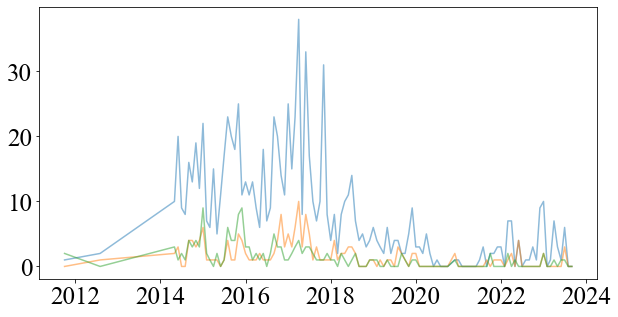

In [33]:
good = [] 
friendly = [] 
comfortable = [] 

for i in range(len(DATA_NO)):
    lists = DATA_NO['Fulltext'][i].split()
    comfortable.append(lists.count('comfortable')) 
    friendly.append(lists.count('friendly'))
    good.append(lists.count('excellent') + lists.count('good')+ lists.count('great'))
    
DATA_NO['good'] = good
DATA_NO['friendly'] = friendly
DATA_NO['comfortable'] = comfortable

DATA_NO['Month'] =DATA_NO['Month'].apply(pd.to_datetime)

plt.figure(figsize=(10,5))

plt.plot(DATA_NO['Month'],DATA_NO['good'],alpha=0.5,label = 'good')
plt.plot(DATA_NO['Month'],DATA_NO['friendly'],alpha=0.5,label = 'friendly')
plt.plot(DATA_NO['Month'],DATA_NO['comfortable'],alpha=0.5,label = 'comfortable')


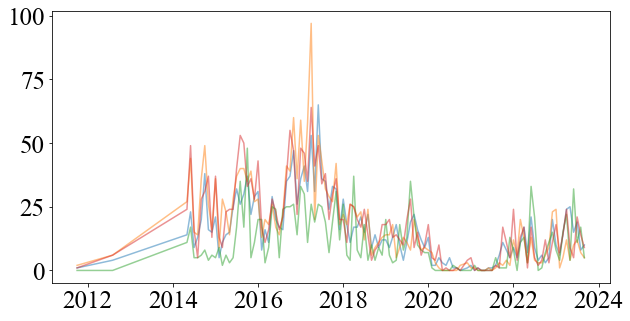

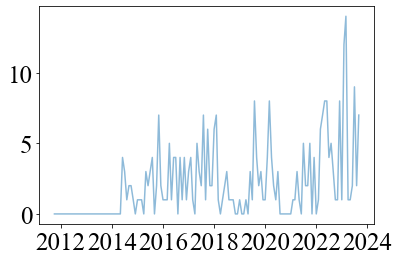

In [34]:
cancelled = []
staff = [] #crew
luggage = [] #bag, baggage
service = []
meal = [] #food
for i in range(len(DATA_NO)):
    lists = DATA_NO['Fulltext'][i].split()
    cancelled.append(lists.count('cancelled'))
    staff.append(lists.count('staff') + lists.count('crew'))
    service.append(lists.count('service'))
    meal.append(lists.count('meal') + lists.count('food'))
    luggage.append(lists.count('luggage') + lists.count('baggage')+ lists.count('bag'))
    
DATA_NO['cancelled'] = cancelled
DATA_NO['staff'] = staff
DATA_NO['luggage'] = luggage
DATA_NO['service'] = service
DATA_NO['meal'] = meal
DATA_NO['Month'] =DATA_NO['Month'].apply(pd.to_datetime)

plt.figure(figsize=(10,5))

plt.plot(DATA_NO['Month'],DATA_NO['service'],alpha=0.5,label = 'Service')
plt.plot(DATA_NO['Month'],DATA_NO['meal'],alpha=0.5,label = 'Meal')
plt.plot(DATA_NO['Month'],DATA_NO['luggage'],alpha=0.5,label = 'Luggage')
plt.plot(DATA_NO['Month'],DATA_NO['staff'],alpha=0.5,label = 'Staff')

plt.show()
plt.plot(DATA_NO['Month'],DATA_NO['cancelled'],alpha=0.5)

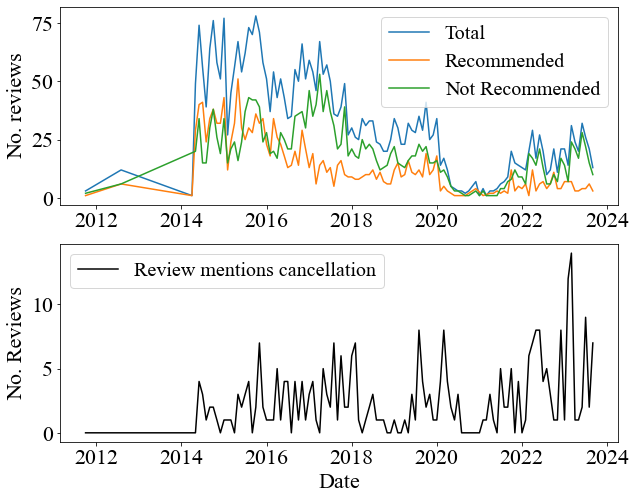

In [37]:
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

mpl.rc('font', size=22)
mpl.rc('xtick', labelsize=22)
mpl.rc('ytick', labelsize=22)
mpl.rc('font',family='Times New Roman')

f,ax = plt.subplots(ncols = 1,nrows=2,figsize=(10,8))
ax= ax.ravel()
VALUE = DATA2.value_counts('Month').reset_index()
VALUE = VALUE.sort_values('Month')
VALUE['Month'] =VALUE['Month'].apply(pd.to_datetime)

ax[0].plot(VALUE['Month'],VALUE[0],label = 'Total')



VALUE = DATA2[DATA2['Recommend']=='yes'].value_counts('Month').reset_index()
VALUE = VALUE.sort_values('Month')
VALUE['Month'] =VALUE['Month'].apply(pd.to_datetime)

ax[0].plot(VALUE['Month'],VALUE[0],label = 'Recommended')


VALUE = DATA2[DATA2['Recommend']=='no'].value_counts('Month').reset_index()
VALUE = VALUE.sort_values('Month')
VALUE['Month'] =VALUE['Month'].apply(pd.to_datetime)

ax[0].plot(VALUE['Month'],VALUE[0],label = 'Not Recommended')

#ax[0].set_xlabel('Date')
ax[0].set_ylabel('No. reviews')
ax[0].legend(fontsize=20)

ax[1].plot(DATA_NO['Month'],DATA_NO['cancelled'],color='black',label='Review mentions cancellation')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('No. Reviews')
ax[1].legend(fontsize=20)
plt.savefig('No_Reviews.pdf',dpi=100,bbox_inches='tight')

In [ ]:
words=[(' '.join(DATA_YES['Fulltext'])),(' '.join(' '.join(DATA_NO['Fulltext'])))]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer() 
vectors = vectorizer.fit_transform(words)

print("n_samples: %d, n_features: %d" % vectors.shape)


tf_idf = pd.DataFrame(vectors.todense()) 
tf_idf.columns = vectorizer.get_feature_names()
tfidf_matrix = tf_idf.T

print(tfidf_matrix)

In [ ]:
tfidf_matrix.sort_values(by =0, ascending=False)[:30]